# Regression & Its Evaluation — Assignment (DA-AG-010)




## Question 1: What is Simple Linear Regression?

**Answer:**  
Simple Linear Regression models the relationship between a single independent variable `X` and a dependent variable `Y` by fitting a straight line:  
\(Y = \beta_0 + \beta_1 X + \varepsilon\)  
where \(\beta_0\) is the intercept, \(\beta_1\) is the slope (change in Y per unit X), and \(\varepsilon\) is the error term. The model is fit by minimizing the sum of squared residuals (OLS).

---

## Question 2: What are the key assumptions of Simple Linear Regression?

**Answer:**  
1. **Linearity:** The expected value of Y is a linear function of X.  
2. **Independence:** Observations (and errors) are independent.  
3. **Homoscedasticity:** The variance of errors is constant across X (no heteroscedasticity).  
4. **Normality of errors:** Errors are normally distributed (important for inference).  
5. **No perfect multicollinearity:** (With single X this isn't applicable, but generally predictors should not be perfectly collinear.)  
6. **Correct model specification:** No important variables omitted and functional form correct.

---

## Question 3: What is heteroscedasticity, and why is it important to address in regression models?

**Answer :**  
Heteroscedasticity occurs when the variance of residuals is not constant across levels of the independent variable(s). It matters because ordinary least squares (OLS) estimates remain unbiased, but standard errors become inconsistent — which invalidates hypothesis tests and confidence intervals. Remedies include transforming the response (e.g., log), using heteroscedasticity-robust (White) standard errors, or using weighted least squares.

---

## Question 4: What is Multiple Linear Regression?

**Answer :**  
Multiple Linear Regression extends simple linear regression to multiple predictors:  
\(Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \varepsilon\).  
It estimates the marginal effect of each predictor while holding others constant. Model diagnostics (multicollinearity, heteroscedasticity, influential points) become more important here.

---

## Question 5: What is polynomial regression, and how does it differ from linear regression?

**Answer:**  
Polynomial regression models non-linear relationships by adding polynomial terms of predictors (e.g., \(X, X^2, X^3\)). It's still linear in parameters (coefficients multiply basis functions), so OLS applies. It differs from simple linear regression because the relationship between X and Y is non-linear; degree selection and overfitting are important considerations.


## Question 6: Fit a Simple Linear Regression model

**Data:** X = [1,2,3,4,5], Y = [2.1,4.3,6.1,7.9,10.2]

Plot the regression line over the data points.

Intercept: 0.1800, Slope: 1.9800, R^2: 0.9979


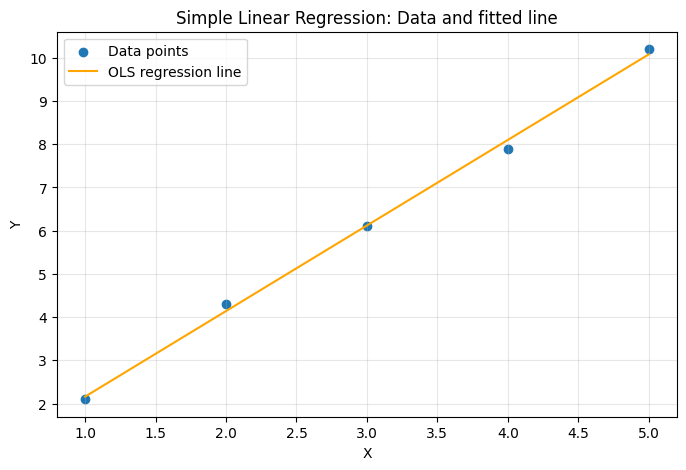

In [1]:
# Q6: Simple Linear Regression (OLS) and plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.1,4.3,6.1,7.9,10.2])

# Fit model
model = LinearRegression()
model.fit(X, Y)
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X,Y)

print(f"Intercept: {intercept:.4f}, Slope: {slope:.4f}, R^2: {r2:.4f}")

# Predictions for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
Y_plot = model.predict(X_plot)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, Y, label='Data points')
plt.plot(X_plot, Y_plot, color='orange', label='OLS regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression: Data and fitted line')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Question 7: Multiple Linear Regression and VIF

**Data:**
Area = [1200,1500,1800,2000]
Rooms = [2,3,3,4]
Price = [250000,300000,320000,370000]

Fit a Multiple Linear Regression model and compute VIF to check multicollinearity.

In [2]:
# Q7: Multiple Linear Regression and VIF
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Data
data = {
    'Area':[1200,1500,1800,2000],
    'Rooms':[2,3,3,4],
    'Price':[250000,300000,320000,370000]
}
df = pd.DataFrame(data)
X = df[['Area','Rooms']]
y = df['Price']

# Fit model (sklearn)
lr = LinearRegression()
lr.fit(X, y)
print("Coefficients:", dict(zip(X.columns, lr.coef_)))
print("Intercept:", lr.intercept_)
print("R^2 score:", lr.score(X,y))

# Compute VIF using statsmodels (requires adding constant)
X_with_const = sm.add_constant(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("\nVIF values (including constant):")
print(vif_data)

# Interpretation printed
print("\nInterpretation:")
print("- VIF > 5 (or >10) suggests problematic multicollinearity. With small sample sizes, interpret carefully.")


Coefficients: {'Area': np.float64(63.15789473684211), 'Rooms': np.float64(34736.842105263146)}
Intercept: 103157.89473684214
R^2 score: 0.9985775248933144

VIF values (including constant):
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842

Interpretation:
- VIF > 5 (or >10) suggests problematic multicollinearity. With small sample sizes, interpret carefully.


## Question 8: Polynomial Regression (degree 2)

**Data:** X = [1,2,3,4,5], Y = [2.2,4.8,7.5,11.2,14.7]

Fit 2nd-degree polynomial and plot curve.

Coefficients (for X and X^2): [1.94 0.2 ]
Intercept: 0.0600000000000005
R^2: 0.999274398355303


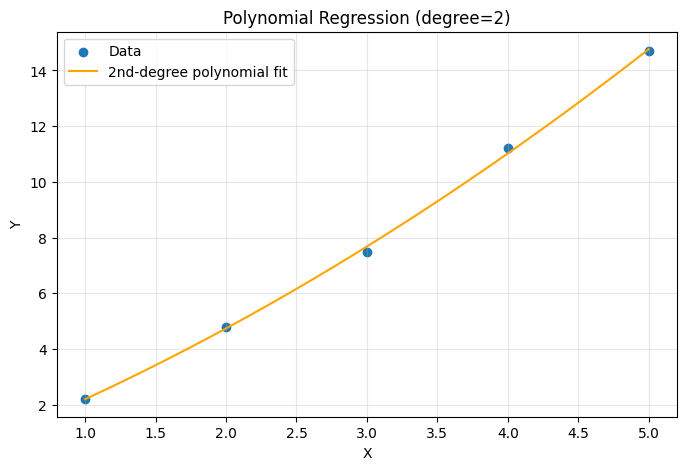

In [3]:
# Q8: Polynomial regression (degree 2)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2,4.8,7.5,11.2,14.7])

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)
r2 = model.score(X_poly, Y)
print("Coefficients (for X and X^2):", model.coef_)
print("Intercept:", model.intercept_)
print("R^2:", r2)

# For plotting
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
X_plot_poly = poly.transform(X_plot)
Y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(8,5))
plt.scatter(X, Y, label='Data')
plt.plot(X_plot, Y_plot, label='2nd-degree polynomial fit', color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (degree=2)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Question 9: Residuals plot and heteroscedasticity

**Data:** X = [10,20,30,40,50], Y = [15,35,40,50,65]

Train a regression model, plot residuals vs predicted values, and assess heteroscedasticity.

Coefficients: [1.15] Intercept: 6.499999999999993
Predictions: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


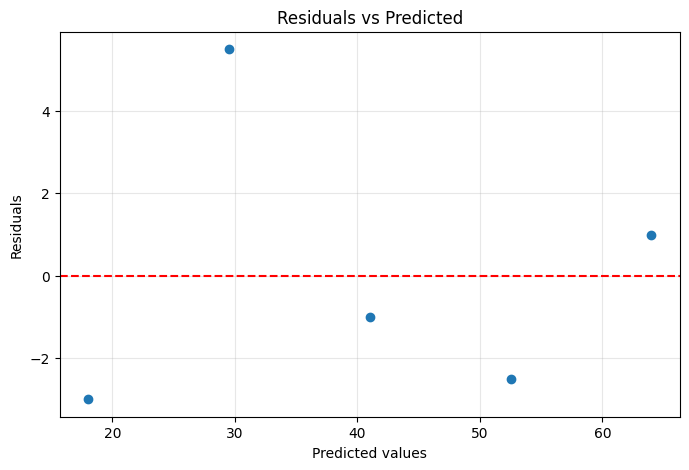

\nAssessment:
- If residual spread increases/decreases with predicted values, heteroscedasticity is present.
- In small samples, visual checks are indicative; statistical tests (Breusch-Pagan) can be used for confirmation.


In [4]:
# Q9: Residuals plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15,35,40,50,65])

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
residuals = Y - y_pred

print("Coefficients:", model.coef_, "Intercept:", model.intercept_)
print("Predictions:", y_pred)
print("Residuals:", residuals)

# Residuals vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(alpha=0.3)
plt.show()

# Simple visual assessment comment printed
print("\\nAssessment:")
print("- If residual spread increases/decreases with predicted values, heteroscedasticity is present.")
print("- In small samples, visual checks are indicative; statistical tests (Breusch-Pagan) can be used for confirmation.")


## Question 10: Real-world scenario (heteroscedasticity and multicollinearity)

Explain steps to address these issues and ensure a robust model.

**Answer (intermediate / action plan):**

1. **Diagnose thoroughly**
   - Detect heteroscedasticity using residual plots and formal tests (Breusch-Pagan, White test).
   - Detect multicollinearity using VIFs and pairwise correlations.

2. **Address multicollinearity**
   - Remove or combine highly correlated features.
   - Use dimensionality reduction (PCA) or regularization (Ridge/Lasso) that penalize coefficients.
   - Center or standardize features to improve numerical stability.

3. **Address heteroscedasticity**
   - Transform the dependent variable (e.g., log(price)) to stabilize variance.
   - Use weighted least squares (WLS) where weights are inverse of variance.
   - Use robust standard errors (heteroscedasticity-consistent SEs) for valid inference.

4. **Modeling and validation**
   - Use cross-validation to check generalization.
   - Compare model performance using metrics (RMSE, MAE) on validation set.
   - Consider non-linear models or interaction terms if supported by domain knowledge.

5. **Deployment considerations**
   - Monitor residual patterns post-deployment, retrain if data distribution changes.
   - Document feature engineering steps and transformations for reproducibility.

This combination of diagnostic tests, transformations, and regularized modeling typically ensures more reliable estimates and better predictive performance in real estate price modeling.
